In this project I will explore the MNIST dataset using a convolutional Neural Network and the Keras library in Tensorflow. ConvNNs are a powerful tool for image recognition. In a fully connected (FC) model, there can quickly become a large number of parameters. This can lead to high training costs, require lots of data, difficulties with optimization and overfitting. ConvNN can exploit the locality of data, and translation invariance of image data to reduce the number of parameters needed. In this model I will use a 3x3 convolution over the 28x28 image. This will be followed by flattening, a dense layer (with relu), and a final dense layer with a softmax activation function.

As the data is categorical by nature, sparse_categorical_crossentropy was selected as the loss function. the sparse option handles one-hot encoding of the batch within the loss method.

$$ \ell_w (x_i,y_i) = - \sum^9_{i=0} y_i\log(\hat{y}_i) $$

For the model Optimizer, I show to go with adam. This is considered a good starting choice for deep learning optimization. Adam incorporated both momentum and RMSProp (with bias correction) to enhance the learning rate of the model. Momentum keeps memory of previous gradients which may help the solution approach a minimization quicker.

$$  v_t = \gamma v_{t-1} + (1-\gamma) \eta $$

RMSProp on the other hand is an adaptive learning rate that reduces the learning rate if big updates are occurring to a parameter, and increase the learning rate if few updates are occurring.
$$
\theta_{t,i} = \theta_{t-1,i} - \frac{\eta}{\sqrt{G_{t,i}+\epsilon}}g_{t,i}
$$
with:
$$
 G_t,i = \beta G_{t-1,i} + (1-\beta) g_{t,i}^2
$$

In this model I acheived an accuracy of 98.2% on the test set.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#load data from tensorflow
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


60000
10000


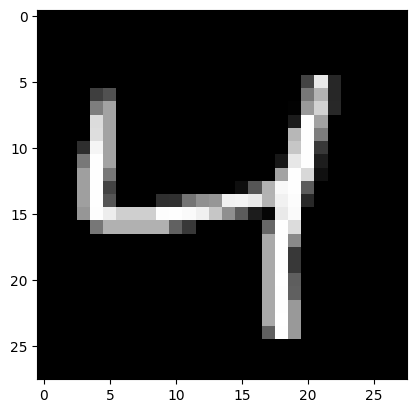

In [3]:
#visualizing the data
print(len(x_train))
print(len(x_test))
plt.imshow(x_train[2], cmap='gray')

In [4]:
#normalize the data to between 0 and 1
x_train, x_test = x_train / 255, x_test /255

#reshape data to 3D array for convolution
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [5]:
#building the model with a convolution, flatten layer, dense layer, and output softmax layer
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, 3, activation='relu'),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dense(10, activation='softmax'),
])


In [6]:
#setting optimizer and loss funciton for model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
#Training the model
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 113s 59ms/step - loss: 0.1401 - accuracy: 0.9576
Epoch 2/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0401 - accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0217 - accuracy: 0.9930
Epoch 4/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0109 - accuracy: 0.9964
Epoch 5/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0096 - accuracy: 0.9969
313/313 - 4s - loss: 0.0695 - accuracy: 0.9823 - 4s/epoch - 13ms/step


[0.06947078555822372, 0.9822999835014343]